## Imports and constants

In [1]:
# Imports for loading and basic visualization of sample results
import re
import os
import pandas as pd
from collections import OrderedDict
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import sem

# Imports for dataset generation
from generation.idealized_generation.idealized_generation import generate_distributions_and_examples
from generation.idealized_generation.idealized_prompt_generator import (
    generate_percentiles_prompts,
    generate_sampling_prompts,
    generate_probabilities_prompts
)
from generation.real_world_generation.real_world_prompt_generator import generate_real_world_percentiles_prompts

# Constants
SEED = 1337
BASE_SAMPLE_COUNT = 10
SAMPLING_TASK_SAMPLE_COUNT = 1000
NUM_SYNTHETIC_EXAMPLES = 20
ENABLE_SYNTHETIC_GENERATION_DEBUG = False
USE_RANDOM_SEED = True

## Idealized dataset generation

### Percentiles

In [2]:
# @title Task-specific distribution and distribution examples generation
# Generate a distirbution to be used in questions as well as a pool of 20
# examples, with different parameters, per a distribution.
# We will sample from this pool in order to generate examples.

percentiles_distributions_and_examples = generate_distributions_and_examples(
    sample_size=100000,
    task='percentiles',
    num_examples=NUM_SYNTHETIC_EXAMPLES,
    enable_debug=ENABLE_SYNTHETIC_GENERATION_DEBUG,
    fixed_seed=SEED,
    enable_approximate_as_normal=False
)

# Both zero-shot and n-shot (e.g., n=1,3,5,7,9) prompts will be generated here.

percentiles_prompts = generate_percentiles_prompts(percentiles_distributions_and_examples,
                                       sample_count=BASE_SAMPLE_COUNT,
                                       shot_list=[0, 1, 3, 5, 7, 9],
                                       use_distribution_stats=False,
                                       use_intermediate_stats=False,)

# It's wise to always sanity check the prompt count below.
# Consider 14 distributions (11 unique, 3 variants of multinomial)
# with 11 percentile_values, SAMPLE_COUNT=10, and 4 shot types (0,1,3,5).
#
# 14*11*10*6 = 9240 total prompts
total_prompts = sum(len(value) for value in percentiles_prompts.values())
print(f"Total number of prompts: {total_prompts}\n")

for key, value in percentiles_prompts.items():
    print(f"Group: {key}")
    print(f"Number of prompts: {len(value)}")
    print(f"Example prompt:\n{value[0]}")
    print('\n' + '='*80 + '\n')

Generated parameters equal to or too similar to existing question params: {'rate': 0.01}. Random param generation will be retried.
Generated parameters equal to or too similar to existing question params: {'rate': 0.009}. Random param generation will be retried.
Generated parameters equal to or too similar to existing question params: {'rate': 0.011}. Random param generation will be retried.
Generated parameters equal to or too similar to existing question params: {'rate': 0.01}. Random param generation will be retried.
Generated parameters equal to or too similar to existing question params: {'rate': 0.01}. Random param generation will be retried.
Generated parameters equal to or too similar to existing question params: {'rate': 0.009}. Random param generation will be retried.
Generated parameters equal to or too similar to existing question params: {'rate': 0.009}. Random param generation will be retried.
Generated parameters equal to or too similar to existing question params: {'p':

### Sampling

In [3]:
# Generate a distirbution to be used in questions as well as a pool of 20
# examples, with different parameters, per a distribution.
# We will sample from this pool in order to generate examples.

sampling_distributions_and_examples = generate_distributions_and_examples(
    sample_size=100000,
    task='sampling',
    num_examples=NUM_SYNTHETIC_EXAMPLES,
    enable_debug=ENABLE_SYNTHETIC_GENERATION_DEBUG,
    fixed_seed=SEED,
)

# @title Produce prompts
# Both zero-shot and n-shot (n=1,3,5,7,9) prompts will be generated here.

sampling_prompts = generate_sampling_prompts(sampling_distributions_and_examples,
                                    sample_count=SAMPLING_TASK_SAMPLE_COUNT,
                                    shot_list=[0, 1, 3, 5, 7, 9],
                                    use_distribution_stats=False)

# It's wise to always sanity check the prompt count below.
# Consider 14 distributions (11 unique, 3 variants of multinomial)
# with 11 percentile_values, SAMPLE_COUNT=10, and 6 shot types (0,1,3,5,7,9).
#
# 14*1000*6 = 84000 total prompts
total_prompts = sum(len(value) for value in sampling_prompts.values())
print(f"Total number of prompts: {total_prompts}\n")

# Let's also get an example from each prompt sub-group
for key, value in sampling_prompts.items():
  print(f"Group: {key}")
  print(f"Example prompt:\n{value[0]}")
  print('\n' + '='*80 + '\n')

Generated parameters equal to or too similar to existing question params: {'rate': 0.01}. Random param generation will be retried.
Generated parameters equal to or too similar to existing question params: {'rate': 0.009}. Random param generation will be retried.
Generated parameters equal to or too similar to existing question params: {'rate': 0.011}. Random param generation will be retried.
Generated parameters equal to or too similar to existing question params: {'rate': 0.01}. Random param generation will be retried.
Generated parameters equal to or too similar to existing question params: {'rate': 0.01}. Random param generation will be retried.
Generated parameters equal to or too similar to existing question params: {'rate': 0.009}. Random param generation will be retried.
Generated parameters equal to or too similar to existing question params: {'rate': 0.009}. Random param generation will be retried.
Generated parameters equal to or too similar to existing question params: {'p':

## Probabilities

In [4]:
# Generate a distirbution to be used in questions as well as a pool of 20
# examples, with different parameters, per a distribution.
# We will sample from this pool in order to generate examples.

probabilities_distributions_and_examples = generate_distributions_and_examples(
    sample_size=100000,
    task='probabilities',
    num_examples=NUM_SYNTHETIC_EXAMPLES,
    enable_debug=ENABLE_SYNTHETIC_GENERATION_DEBUG,
    fixed_seed=SEED,
)

# @title Produce prompts
# Both zero-shot and n-shot (n=1,3,5,7,9) prompts will be generated here.

probabilities_prompts = generate_probabilities_prompts(probabilities_distributions_and_examples,
                                       sample_count=BASE_SAMPLE_COUNT,
                                       shot_list=[0, 1, 3, 5, 7, 9],
                                       use_distribution_stats=False,
                                       use_intermediate_stats=True,)

# It's wise to always sanity check the prompt count below.
# Consider 14 distributions (11 unique, 3 variants of multinomial)
# with 10 target ranges, SAMPLE_COUNT=10, and 6 shot types (0,1,3,5,7,9).
#
# 14*10*10*6 = 8400 total prompts
total_prompts = sum(len(value) for value in probabilities_prompts.values())
print(f"Total number of prompts: {total_prompts}\n")

# Let's also get an example from each prompt sub-group
for key, value in probabilities_prompts.items():
  print(f"Group: {key}")
  print(f"Example prompt:\n{value[0]}")
  print('\n' + '='*80 + '\n')

Generated parameters equal to or too similar to existing question params: {'rate': 0.01}. Random param generation will be retried.
Generated parameters equal to or too similar to existing question params: {'rate': 0.009}. Random param generation will be retried.
Generated parameters equal to or too similar to existing question params: {'rate': 0.011}. Random param generation will be retried.
Generated parameters equal to or too similar to existing question params: {'rate': 0.01}. Random param generation will be retried.
Generated parameters equal to or too similar to existing question params: {'rate': 0.01}. Random param generation will be retried.
Generated parameters equal to or too similar to existing question params: {'rate': 0.009}. Random param generation will be retried.
Generated parameters equal to or too similar to existing question params: {'rate': 0.009}. Random param generation will be retried.
Generated parameters equal to or too similar to existing question params: {'p':

## Real-world dataset generation

In [5]:
# Generate idealized real-world, real-world, and real-world with normal approx. prompts
prompts = generate_real_world_percentiles_prompts(sample_count=BASE_SAMPLE_COUNT)

# It's wise to always sanity check the prompt count below.
# Consider 4
# with 11 percentile_values, SAMPLE_COUNT=10, and 1 shot types (0).
#
# 4*11*10*1 = 440 total prompts
# For 3 tasks, this would end up being 440*3=1320
# For 3 prompting strategies, this would end up being 1320 * 3 = 3960.
total_prompts = sum(len(value) for value in prompts.values())
print(f"Total number of prompts: {total_prompts}\n")

# Let's also get an example from each prompt sub-group
for key, value in prompts.items():
  print(f"Group: {key}")
  print(f"Example prompt:\n{value[0]}")
  print('\n' + '='*80 + '\n')

Total number of prompts: 3960

Group: percentiles_zero_shot_idealized_average_step_count_10_samples
Example prompt:

## You are an expert on statistics. Your task is to estimate the percentile of a number within a specific distribution. Do not use any additional tools such as code generation or search engines. Do not use any additional tools such as code generation or search engines. Answer with just a numerical response from 0 to 100.  Make sure your answer is enclosed by xml tags <answer> and </answer>.

## Consider the following distribution:


  Distribution Type: Normal Distribution
  Mean: 8366.971
  Standard Deviation: 3291.940


## Here is your question:
Question:
What is the percentile of the value 2174.61 within the provided distribution? Do not use any additional tools such as code generation or search engines. Answer with just a numerical response from 0 to 100. Make sure your answer is enclosed by xml tags <answer> and </answer>.
Answer:



Group: percentiles_zero_shot_rea

## Loading and visualizing sample results

In [7]:
# Directory paths
# Adjust below paths if needed (relative paths provided by default)
idealized_real_world_path = './sample_results_from_paper/idealized_real_world'
real_world_path = './sample_results_from_paper/real_world'
real_world_normal_approx_path = './sample_results_from_paper/real_world_Normal_approx'

# List of distributions for health, finance, and climate
distributions = [
    'average_azm_count',
    'average_resting_heart_rate',
    'average_sleep_minutes',
    'average_step_count',
    'monthly_gross_rent',
    'annual_electricity_cost',
    'annual_water_cost',
    'annual_household_income',
    'average_temperature',
    'annual_precipitation',
    'average_wind_speed',
    'average_relative_humidity'
]

sample_count = 10

# Valid prefix for the model name
valid_prefix = 'gemini_ultra'

# Mapping of category names to the corresponding suffixes in the filenames
category_suffix_map = {
    'idealized': 'synthetic_',
    'real_world': 'distnameandstats_',
    'real_world_normal_approx': 'true_NA_',
}

# Helper function to categorize filenames
def categorize_filename(filename):
    if 'synthetic' in filename:
        return 'idealized'
    elif 'distnameandstats' in filename:
        return 'real_world'
    elif 'NA' in filename:
        return 'real_world_normal_approx'
    else:
        raise ValueError(f"Unknown category: {filename}")

# Function to load DataFrames from a directory
def load_dataframes_from_directory(directory_path, distributions, sample_count, valid_prefix):
    dataframes = OrderedDict()

    # Iterate through the files in the directory
    for file in os.listdir(directory_path):
        if file.endswith('.csv') and file.startswith(valid_prefix):
            # Categorize the file based on its name
            category = categorize_filename(file)
            print(f"File: {file}, Category: {category}")
            # Extract the distribution name from the filename
            for dist in distributions:
                pattern = f"percentiles_zero_shot_{category_suffix_map[category]}{dist}_{sample_count}_samples"

                if pattern in file:
                    key = f"percentiles_zero_shot_{category_suffix_map[category]}{dist}_{sample_count}_samples"
                    file_path = os.path.join(directory_path, file)

                    # Load the DataFrame
                    df = pd.read_csv(file_path)

                    # Add the DataFrame to the dictionary under the appropriate category
                    if category not in dataframes:
                        dataframes[category] = OrderedDict()
                    dataframes[category][key] = df
                    break  # Stop searching for the distribution name once found

    return dataframes

# Function to load DataFrames from all specified directories
def load_all_dataframes(directories, distributions, sample_count, valid_prefix):
    all_dataframes = OrderedDict()

    for dir_path in directories:
        dataframes = load_dataframes_from_directory(dir_path, distributions, sample_count, valid_prefix)
        for category, dfs in dataframes.items():
            if category not in all_dataframes:
                all_dataframes[category] = OrderedDict()
            all_dataframes[category].update(dfs)

    return all_dataframes

# Directory paths list
directories = [idealized_real_world_path, real_world_path, real_world_normal_approx_path]

# Load the DataFrames from all directories
all_dataframes = load_all_dataframes(directories, distributions, sample_count, valid_prefix)

# Print the keys to verify
for category, dfs in all_dataframes.items():
    print(f"Category: {category}")
    for key in dfs.keys():
        print(f"  Key: {key}")

File: gemini_ultra_percentiles_zero_shot_synthetic_annual_household_income_10_samples.csv, Category: idealized
File: gemini_ultra_percentiles_zero_shot_synthetic_average_temperature_10_samples.csv, Category: idealized
File: gemini_ultra_percentiles_zero_shot_synthetic_average_wind_speed_10_samples.csv, Category: idealized
File: gemini_ultra_percentiles_zero_shot_synthetic_average_resting_heart_rate_10_samples.csv, Category: idealized
File: gemini_ultra_percentiles_zero_shot_synthetic_annual_water_cost_10_samples.csv, Category: idealized
File: gemini_ultra_percentiles_zero_shot_synthetic_annual_electricity_cost_10_samples.csv, Category: idealized
File: gemini_ultra_percentiles_zero_shot_synthetic_average_step_count_10_samples.csv, Category: idealized
File: gemini_ultra_percentiles_zero_shot_synthetic_monthly_gross_rent_10_samples.csv, Category: idealized
File: gemini_ultra_percentiles_zero_shot_synthetic_average_azm_count_10_samples.csv, Category: idealized
File: gemini_ultra_percentile

In [8]:
# @title Fetch ground truth data

health_gt_dict = {
    'Average Step Count': {
        'target_percentile_values': {
            1.0: 2174.61,
            10.0: 4433.794,
            20.0: 5558.104,
            30.0: 6445.293,
            40.0: 7244.214,
            50.0: 8028.321,
            60.0: 8845.736,
            70.0: 9791.713,
            80.0: 11000.567,
            90.0: 12792.197,
            99.0: 17510.718
        },
        'target_ranges': {
            0.102: (7635.28, 8418.632),
            0.204: (7258.529, 8827.968),
            0.306: (6867.371, 9267.069),
            0.408: (6475.844, 9750.122),
            0.51: (6049.556, 10295.755),
            0.612: (5615.236, 10912.331),
            0.714: (5121.244, 11654.698),
            0.816: (4540.99, 12599.002),
            0.918: (3762.946, 14040.506),
            1.0: (2174.624, 17510.715)
        }
    },
    'Average Resting Heart Rate': {
        'target_percentile_values': {
            1.0: 52.286,
            10.0: 57.838,
            20.0: 60.905,
            30.0: 63.324,
            40.0: 65.49,
            50.0: 67.552,
            60.0: 69.692,
            70.0: 71.971,
            80.0: 74.651,
            90.0: 78.33,
            99.0: 85.438
        },
        'target_ranges': {
            0.102: (66.533, 68.593),
            0.204: (65.529, 69.652),
            0.306: (64.483, 70.719),
            0.408: (63.411, 71.87),
            0.51: (62.275, 73.109),
            0.612: (61.06, 74.471),
            0.714: (59.7, 76.052),
            0.816: (58.127, 77.973),
            0.918: (56.125, 80.6),
            1.0: (52.286, 85.437)
        }
    },
    'Average Sleep Minutes': {
        'target_percentile_values': {
            1.0: 280.833,
            10.0: 331.325,
            20.0: 354.023,
            30.0: 369.714,
            40.0: 382.807,
            50.0: 394.37,
            60.0: 405.83,
            70.0: 417.892,
            80.0: 431.841,
            90.0: 450.636,
            99.0: 493.97
        },
        'target_ranges': {
            0.102: (388.837, 399.956),
            0.204: (383.053, 405.594),
            0.306: (376.862, 411.435),
            0.408: (370.266, 417.4),
            0.51: (363.193, 423.8),
            0.612: (355.048, 430.84),
            0.714: (345.566, 439.116),
            0.816: (333.671, 448.76),
            0.918: (316.5, 462.952),
            1.0: (280.833, 493.97)
        }
    },
    'Average AZM Count': {
        'target_percentile_values': {
            1.0: 7.286,
            10.0: 13.788,
            20.0: 19.158,
            30.0: 24.212,
            40.0: 29.466,
            50.0: 35.226,
            60.0: 42.0,
            70.0: 50.431,
            80.0: 62.089,
            90.0: 82.821,
            99.0: 153.72
        },
        'target_ranges': {
            0.102: (32.327, 38.413),
            0.204: (29.563, 41.859),
            0.306: (27.005, 45.641),
            0.408: (24.434, 50.072),
            0.51: (21.923, 55.143),
            0.612: (19.473, 61.21),
            0.714: (16.934, 69.305),
            0.816: (14.239, 80.5),
            0.918: (11.343, 98.569),
            1.0: (7.286, 153.72)
        }
    }
}

finance_gt_dict = {
    'Monthly Gross Rent': {
        'target_percentile_values': {
            1.0: 331.0,
            10.0: 666.0,
            20.0: 813.0,
            30.0: 937.0,
            40.0: 1055.0,
            50.0: 1187.0,
            60.0: 1355.0,
            70.0: 1548.0,
            80.0: 1800.0,
            90.0: 2235.0,
            99.0: 3635.0
        },
        'target_ranges': {
            0.103: (1118.0, 1263.0),
            0.205: (1058.0, 1350.0),
            0.308: (1000.0, 1440.0),
            0.408: (942.0, 1539.0),
            0.511: (882.0, 1650.0),
            0.614: (820.0, 1782.0),
            0.715: (755.0, 1950.0),
            0.818: (680.0, 2189.0),
            0.918: (580.0, 2597.0),
            1.0: (331.0, 3635.0)
        }
    },
    'Annual Electricity Cost': {
        'target_percentile_values': {
            1.0: 360.0,
            10.0: 720.0,
            20.0: 960.0,
            30.0: 1200.0,
            40.0: 1320.0,
            50.0: 1560.0,
            60.0: 1800.0,
            70.0: 2160.0,
            80.0: 2520.0,
            90.0: 3240.0,
            99.0: 4800.0
        },
        'target_ranges': {
            0.21: (1440.0, 1800.0),
            0.244: (1320.0, 1800.0),
            0.387: (1200.0, 2040.0),
            0.425: (1200.0, 2160.0),
            0.562: (1080.0, 2400.0),
            0.634: (960.0, 2520.0),
            0.725: (840.0, 2880.0),
            0.816: (720.0, 3240.0),
            0.908: (600.0, 3600.0),
            1.0: (360.0, 4800.0)
        }
    },
    'Annual Water Cost': {
        'target_percentile_values': {
            1.0: 20.0,
            10.0: 50.0,
            20.0: 90.0,
            30.0: 180.0,
            40.0: 360.0,
            50.0: 480.0,
            60.0: 600.0,
            70.0: 780.0,
            80.0: 1000.0,
            90.0: 1200.0,
            99.0: 2400.0
        },
        'target_ranges': {
            0.103: (420.0, 580.0),
            0.22: (360.0, 600.0),
            0.307: (270.0, 700.0),
            0.409: (190.0, 780.0),
            0.518: (120.0, 870.0),
            0.606: (100.0, 980.0),
            0.721: (70.0, 1100.0),
            0.848: (50.0, 1200.0),
            0.923: (40.0, 1500.0),
            1.0: (20.0, 2400.0)
        }
    },
    'Annual Household Income': {
        'target_percentile_values': {
            1.0: 0.0,
            10.0: 14400.0,
            20.0: 24500.0,
            30.0: 33600.0,
            40.0: 42900.0,
            50.0: 52800.0,
            60.0: 64800.0,
            70.0: 79000.0,
            80.0: 99000.0,
            90.0: 132400.0,
            99.0: 267000.0
        },
        'target_ranges': {
            0.103: (47400.0, 58000.0),
            0.205: (42200.0, 64000.0),
            0.307: (38000.0, 70000.0),
            0.405: (33200.0, 77700.0),
            0.507: (29000.0, 86000.0),
            0.606: (24200.0, 96900.0),
            0.711: (19600.0, 110000.0),
            0.808: (14400.0, 128600.0),
            0.91: (8600.0, 160000.0),
            1.0: (0.0, 267000.0)
        }
    }
}


climate_gt_dict = {
    'Average Temperature': {
        'target_percentile_values': {
            1.0: -21.7,
            10.0: -6.4,
            20.0: -0.4,
            30.0: 3.8,
            40.0: 8.0,
            50.0: 11.8,
            60.0: 15.3,
            70.0: 18.9,
            80.0: 22.8,
            90.0: 26.8,
            99.0: 30.9
        },
        'target_ranges': {
            0.106: (10.0, 13.6),
            0.208: (8.1, 15.3),
            0.308: (6.1, 17.0),
            0.411: (4.0, 18.8),
            0.511: (1.9, 20.6),
            0.613: (-0.1, 22.6),
            0.715: (-2.5, 24.7),
            0.818: (-5.7, 26.6),
            0.921: (-10.7, 28.2),
            1.0: (-21.7, 30.9)
        }
    },
    'Annual Precipitation': {
        'target_percentile_values': {
            1.0: 17.8,
            10.0: 178.47,
            20.0: 293.6,
            30.0: 402.2,
            40.0: 517.8,
            50.0: 647.5,
            60.0: 802.2,
            70.0: 975.6,
            80.0: 1216.46,
            90.0: 1526.86,
            99.0: 2025.849
        },
        'target_ranges': {
            0.102: (582.23, 717.57),
            0.204: (520.46, 799.1),
            0.306: (462.9, 884.01),
            0.408: (406.6, 968.46),
            0.51: (352.15, 1071.75),
            0.612: (299.6, 1199.22),
            0.714: (247.6, 1341.98),
            0.816: (188.44, 1497.18),
            0.918: (114.3, 1675.48),
            1.0: (17.8, 2025.6)
        }
    },
    'Average Wind Speed': {
        'target_percentile_values': {
            1.0: 0.5,
            10.0: 1.3,
            20.0: 1.8,
            30.0: 2.2,
            40.0: 2.6,
            50.0: 3.0,
            60.0: 3.5,
            70.0: 4.0,
            80.0: 4.7,
            90.0: 5.7,
            99.0: 8.2
        },
        'target_ranges': {
            0.122: (2.8, 3.2),
            0.251: (2.6, 3.5),
            0.314: (2.5, 3.7),
            0.45: (2.2, 4.0),
            0.526: (2.1, 4.3),
            0.627: (1.8, 4.6),
            0.739: (1.6, 5.1),
            0.837: (1.3, 5.6),
            0.923: (1.0, 6.4),
            1.0: (0.5, 8.2)
        }
    },
    'Average Relative Humidity': {
        'target_percentile_values': {
            1.0: 23.0,
            10.0: 45.0,
            20.0: 55.0,
            30.0: 62.0,
            40.0: 67.0,
            50.0: 71.0,
            60.0: 75.0,
            70.0: 79.0,
            80.0: 83.0,
            90.0: 88.0,
            99.0: 96.0
        },
        'target_ranges': {
            0.127: (69.0, 73.0),
            0.227: (67.0, 75.0),
            0.322: (65.0, 77.0),
            0.432: (62.0, 79.0),
            0.532: (59.0, 81.0),
            0.623: (56.0, 83.0),
            0.725: (51.0, 85.0),
            0.827: (46.0, 88.0),
            0.921: (38.0, 91.0),
            1.0: (23.0, 96.0)
        }
    }
}

In [9]:
# @title Process dataframes
# Result will be dataframes with quantity/target_number, estimate, and GT

# Define the mapping from filename distribution names to ground truth dictionary keys
distribution_name_mapping = {
    'average_step_count': 'Average Step Count',
    'average_resting_heart_rate': 'Average Resting Heart Rate',
    'average_sleep_minutes': 'Average Sleep Minutes',
    'average_azm_count': 'Average AZM Count',
    'monthly_gross_rent': 'Monthly Gross Rent',
    'annual_electricity_cost': 'Annual Electricity Cost',
    'annual_water_cost': 'Annual Water Cost',
    'annual_household_income': 'Annual Household Income',
    'average_temperature': 'Average Temperature',
    'annual_precipitation': 'Annual Precipitation',
    'average_wind_speed': 'Average Wind Speed',
    'average_relative_humidity': 'Average Relative Humidity',
}

# Combined distributions dictionary for reference
distributions_and_examples = {
    **health_gt_dict,
    **finance_gt_dict,
    **climate_gt_dict
}

# Function to extract number from the prompt column
def extract_number(row, distribution_name, category):
    # Define regex patterns for health prompts
    health_pattern = re.compile(
        r'(average step count value|average resting heart rate value|average sleep minutes count value|average exercise minutes count value) (\d+\.?\d*)'
    )

    # Define regex patterns for finance prompts
    finance_patterns = {
        'annual_household_income': re.compile(r'annual household income value of \$(\d+\.?\d*)'),
        'monthly_gross_rent': re.compile(r'monthly gross rent of \$(\d+\.?\d*)'),
        'annual_electricity_cost': re.compile(r'annual electricity cost of \$(\d+\.?\d*)'),
        'annual_water_cost': re.compile(r'annual water cost of \$(\d+\.?\d*)')
    }

    # Define regex patterns for climate prompts
    climate_patterns = {
        'average_relative_humidity': re.compile(r'average relative humidity of (\d+\.?\d*)%'),
        'average_temperature': re.compile(r'average temperature of (-?\d+\.?\d*) degrees Celsius'),
        'annual_precipitation': re.compile(r'annual precipitation value of (\d+\.?\d*) millimeters'),
        'average_wind_speed': re.compile(r'average wind speed of (\d+\.?\d*) meters per second')
    }

    # Special case for idealized category
    if category == 'idealized':
        idealized_pattern = re.compile(r'What is the percentile of the value (-?\d+\.?\d*) within the provided distribution\?')
        number_match = idealized_pattern.search(row['prompt'])
        if number_match:
            return float(number_match.group(1))
        return None

    # Select the correct pattern based on the distribution name
    if distribution_name in ['average_step_count', 'average_resting_heart_rate', 'average_sleep_minutes', 'average_azm_count']:
        pattern = health_pattern
    elif distribution_name in finance_patterns:
        pattern = finance_patterns[distribution_name]
    elif distribution_name in climate_patterns:
        pattern = climate_patterns[distribution_name]
    else:
        return None

    # Match the pattern and extract the number
    if distribution_name in finance_patterns or distribution_name in climate_patterns:
        number_matches = pattern.findall(row['prompt'])
        if number_matches:
            return float(number_matches[-1])
    else:
        number_matches = pattern.findall(row['prompt'])
        if number_matches:
            return float(number_matches[-1][1])

    return None

# Function to apply the processing steps to a DataFrame
def process_dataframe(df, distribution_name, category):
    if 'prompt' not in df.columns:
        print("Error: 'prompt' column is missing from the DataFrame")
        return pd.DataFrame()  # Return an empty DataFrame

    df['quantity'] = df.apply(lambda row: extract_number(row, distribution_name, category), axis=1)

    # Convert 'quantity' and 'answer' to numeric, handling errors
    df['quantity'] = pd.to_numeric(df['quantity'], errors='coerce')
    df['percentile'] = pd.to_numeric(df['answer'], errors='coerce')

    # Count rows before dropping NaNs
    rows_before = len(df)

    # Drop rows with NaN values in either 'quantity' or 'percentile'
    df.dropna(subset=['quantity', 'percentile'], inplace=True)

    # Filter 'percentile' within the range of 0 to 100
    df = df[(df['percentile'] >= 0) & (df['percentile'] <= 100)]

    # Count rows after processing
    rows_after = len(df)
    print(f"Dropped {rows_before - rows_after} rows out of {rows_before}")

    return df[['quantity', 'percentile']]

# Function to get ground truth percentiles for a given distribution and quantity
def get_ground_truth_percentile(distribution_name, quantity):
    if distribution_name in distribution_name_mapping:
        dist_name = distribution_name_mapping[distribution_name]
        if dist_name in distributions_and_examples:
            target_values = distributions_and_examples[dist_name]['target_percentile_values']
            closest_percentile = None
            smallest_diff = float('inf')
            for percentile, value in target_values.items():
                diff = abs(value - quantity)
                if diff < smallest_diff:
                    smallest_diff = diff
                    closest_percentile = percentile
            return closest_percentile
    return None

# Function to apply the processing steps to a DataFrame and compare with ground truth
def process_and_compare_dataframe(df, distribution_name, category):
    df = process_dataframe(df, distribution_name, category)  # Apply the initial processing

    if df.empty:
        print(f"DataFrame for {distribution_name} is empty after processing.")
        return df

    df['ground_truth_percentile'] = df['quantity'].apply(
        lambda x: get_ground_truth_percentile(distribution_name, x)
    )
    print(df.head())
    # Ensure there are 10 samples for each unique combination of quantity and percentile
    if 'ground_truth_percentile' in df.columns:
        df['count'] = df.groupby(['quantity', 'percentile', 'ground_truth_percentile']).cumcount()
        df = df[df['count'] < 10]

    return df[['quantity', 'percentile', 'ground_truth_percentile']]

# Process each DataFrame and compare with ground truth
processed_results = {}
for category, dfs in all_dataframes.items():
    processed_results[category] = {}
    for name, df in dfs.items():
        print(f"Processing DataFrame: {name}")
        # Extract distribution name from key (adjust this extraction logic based on your key format)
        try:
            distribution_name = re.search(
                r'percentiles_zero_shot_(?:synthetic|distnameandstats|true_NA)_([\w_]+)_\d+_samples',
                name
            ).group(1)
        except AttributeError:
            print(f"Error: Unable to extract distribution name from {name}")
            continue

        processed_results[category][name] = process_and_compare_dataframe(df, distribution_name, category)

print(f"Total processed DataFrames: {len(processed_results)}")

# Verify the results
total_length = 0

for category, dfs in processed_results.items():
    print(f"Category: {category}")
    for name, df in dfs.items():
        # Print distribution name and head of the DataFrame
        print(f"  Distribution: {name}")
        print(df.head())

        # Check for any NaN values in the columns
        if df.isnull().values.any():
            print(f"Warning: NaN values found in the DataFrame for {name}")

        # Ensure percentiles are within the valid range (0 to 100)
        if not df['percentile'].between(0, 100).all():
            print(f"Warning: Invalid percentiles found in the 'percentile' column for {name}")

        if 'ground_truth_percentile' in df.columns and not df['ground_truth_percentile'].between(0, 100).all():
            print(f"Warning: Invalid percentiles found in the 'ground_truth_percentile' column for {name}")

        # Print the total length of the DataFrame
        total_length += len(df)

print(f"Total length of all processed DataFrames: {total_length}")

Processing DataFrame: percentiles_zero_shot_synthetic_annual_household_income_10_samples
Dropped 0 rows out of 110
   quantity  percentile  ground_truth_percentile
0       0.0         0.0                      1.0
1       0.0         0.0                      1.0
2       0.0         0.0                      1.0
3       0.0         0.0                      1.0
4       0.0         0.0                      1.0
Processing DataFrame: percentiles_zero_shot_synthetic_average_temperature_10_samples
Dropped 0 rows out of 110
   quantity  percentile  ground_truth_percentile
0     -21.7         0.0                      1.0
1     -21.7         0.0                      1.0
2     -21.7         0.0                      1.0
3     -21.7         0.0                      1.0
4     -21.7         0.0                      1.0
Processing DataFrame: percentiles_zero_shot_synthetic_average_wind_speed_10_samples
Dropped 0 rows out of 110
   quantity  percentile  ground_truth_percentile
0       0.5         0.0    

In [11]:
# Define the mapping from keys to more readable plot titles
title_mapping = {
    'average_step_count': 'Avg. Step Counts',
    'average_resting_heart_rate': 'Avg. Resting Heart Rates',
    'average_sleep_minutes': 'Avg. Sleep Minutes',
    'average_azm_count': 'Avg. Exercise Minutes',
    'annual_household_income': 'Avg. Annual Household Income',
    'monthly_gross_rent': 'Avg. Monthly Gross Rent',
    'annual_electricity_cost': 'Avg. Annual Electricity Cost',
    'annual_water_cost': 'Avg. Annual Water Cost',
    'average_temperature': 'Avg. Temperature',
    'annual_precipitation': 'Avg. Annual Precipitation',
    'average_wind_speed': 'Avg. Wind Speed',
    'average_relative_humidity': 'Avg. Relative Humidity',
}

# Force ordering to match slides
category_order = {
    'Health': [
        'Avg. Step Counts',
        'Avg. Resting Heart Rates',
        'Avg. Sleep Minutes',
        'Avg. Exercise Minutes'
    ],
    'Finance': [
        'Avg. Annual Household Income',
        'Avg. Monthly Gross Rent',
        'Avg. Annual Electricity Cost',
        'Avg. Annual Water Cost'
    ],
    'Climate': [
        'Avg. Temperature',
        'Avg. Annual Precipitation',
        'Avg. Wind Speed',
        'Avg. Relative Humidity'
    ]
}

# Function to determine the task from the title
def get_task_from_title(title):
    if any(substring in title for substring in title_mapping.keys()):
        return next(value for key, value in title_mapping.items() if key in title)
    return None

def plot_results_and_gt(
    results: dict,
    nrows: int = 2,
    ncols: int = 2,
    ylim: int = 100,
    ymin: int = 0,
    log_scale: bool = False,
    filter_category: str = None
):
    # Apply the title mapping to results and filter by category if specified
    filtered_results = {
        get_task_from_title(title): df for title, df in results.items()
        if get_task_from_title(title) and (filter_category is None or filter_category in category_order and get_task_from_title(title) in category_order[filter_category])
    }

    # Sort the filtered results by the defined order
    if filter_category and filter_category in category_order:
        ordered_titles = category_order[filter_category]
        filtered_results = {title: filtered_results[title] for title in ordered_titles if title in filtered_results}

    fig, axes = plt.subplots(
        nrows=nrows, ncols=ncols, figsize=(5 * ncols, 5 * nrows)
    )
    axes = axes.flatten() if nrows * ncols > 1 else [axes]

    all_maes = []

    for ax, (title, df) in zip(axes, filtered_results.items()):
        df['quantity'] = pd.to_numeric(df['quantity'], errors='coerce')
        df['percentile'] = pd.to_numeric(df['percentile'], errors='coerce')
        df['ground_truth_percentile'] = pd.to_numeric(df['ground_truth_percentile'], errors='coerce')

        # Calculate dynamic xlim and xmin based on the range of quantity values in results and ground truth
        all_values = df['quantity'].values
        xmin = np.min(all_values)
        xlim = np.max(all_values)
        print(f"Plotting {title}: xmin={xmin}, xlim={xlim}")

        # Plotting the results and ground truth
        sns.scatterplot(
            data=df,
            x='quantity',
            y='percentile',
            marker='o',
            s=150,
            alpha=0.3,
            ax=ax,
        )
        sns.lineplot(
            data=df,
            x='quantity',
            y='ground_truth_percentile',
            color='darkred',
            lw=2,
            linestyle='--',
            alpha=0.5,
            ax=ax,
            ci=None  # Disable confidence interval shading
        )

        # Apply log scale if requested
        if log_scale and ('power_law' in title or 'gumbel' in title):
            ax.set_xscale('log')

        # Calculate the Mean Absolute Error (MAE)
        mae = np.mean(np.abs(df['percentile'] - df['ground_truth_percentile']))
        all_maes.append(mae)

        # Display MAE on the plot in the bottom right
        ax.text(
            0.95,  # Move to the right side of the axis
            0.05,  # Move to the bottom of the axis
            f'MAE: {mae:.2f}',
            horizontalalignment='right',  # Right align the text
            verticalalignment='bottom',  # Bottom align the text
            transform=ax.transAxes,
            fontsize=15,
            color='red',
        )

        ax.set_title(title)
        ax.set_xlim([xmin, xlim])
        if ylim > 0:
            ax.set_ylim([ymin, ylim])

    plt.tight_layout()
    plt.show()

    # Calculate overall mean and standard error for MAEs
    overall_mean_mae = np.mean(all_maes)
    overall_se_mae = sem(all_maes)

    print(f"Overall Mean MAE: {overall_mean_mae:.2f}")
    print(f"Overall Standard Error of MAE: {overall_se_mae:.2f}")

In [12]:
print(processed_results.keys())

dict_keys(['idealized', 'real_world', 'real_world_normal_approx'])


Plotting Avg. Step Counts: xmin=2174.61, xlim=17510.718
Plotting Avg. Resting Heart Rates: xmin=52.286, xlim=85.438
Plotting Avg. Sleep Minutes: xmin=280.833, xlim=493.97
Plotting Avg. Exercise Minutes: xmin=7.286, xlim=153.72


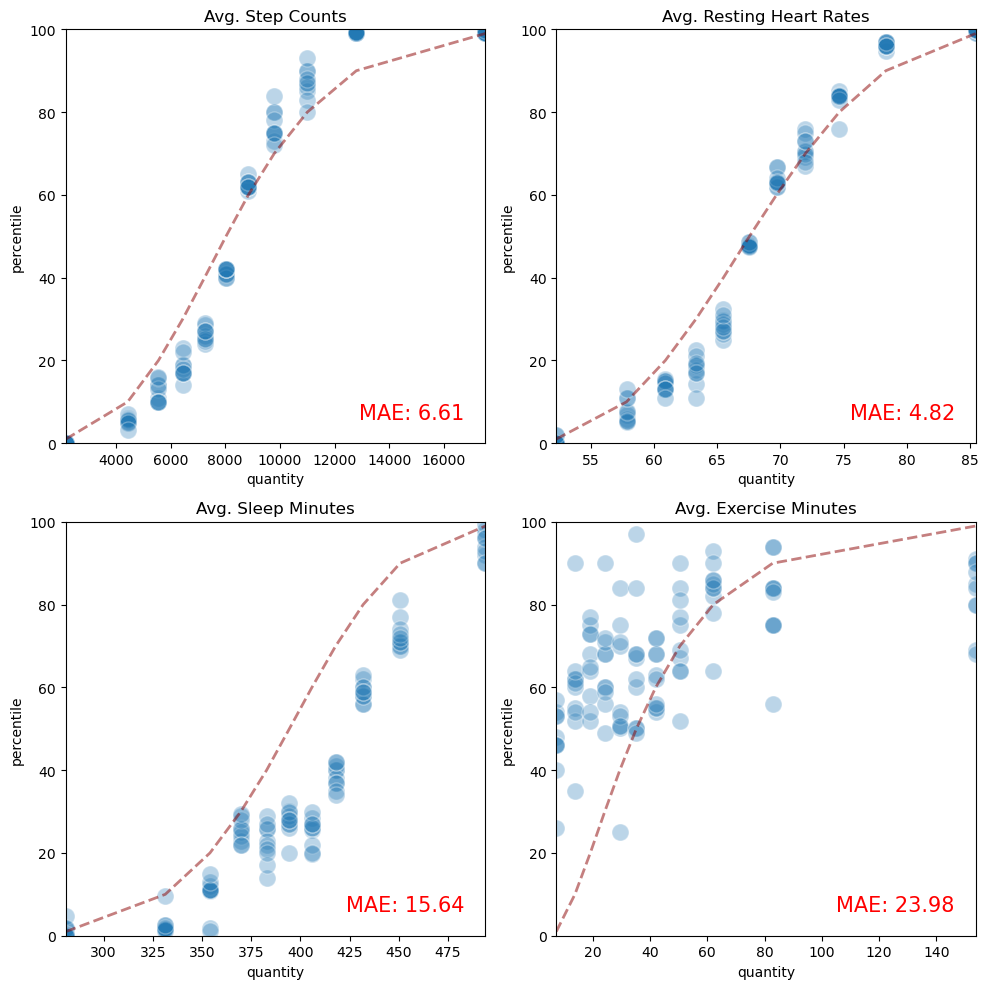

Overall Mean MAE: 12.76
Overall Standard Error of MAE: 4.43


In [13]:
plot_results_and_gt(processed_results['idealized'], filter_category='Health')